# Import Library

In [151]:
import math
import os
import gc
import random
import pprint
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns

# Warning Libraries 
import warnings
warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from scipy import stats                         # For statistics


"""Plotly visualization"""
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
  


from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.preprocessing import PowerTransformer 
from sklearn.feature_selection import SelectKBest, f_classif, chi2

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Algorithms
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from xgboost  import XGBClassifier
from catboost import CatBoostClassifier, Pool
from lightgbm  import LGBMClassifier


import multiprocessing
import pickle, joblib
from sklearn.metrics import matthews_corrcoef, roc_auc_score, precision_recall_curve, confusion_matrix, classification_report, roc_curve, auc

from sklearn.utils import resample
from IPython.display import Markdown, display

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))

     

In [152]:
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
### To be able to see maximum columns on screen

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [154]:

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# **Dataset import**

In [155]:

df = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data understanding

### Head

In [156]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Tail

In [157]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### **Shape**

In [158]:
df.shape

(7043, 21)

### Info

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Describe

In [160]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Dtypes

In [161]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Columns

In [162]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Droping unwanted column

In [163]:
df.drop('customerID',axis =1,inplace =True)

### Missing values

In [164]:
# Missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Churn,0,0.0
TotalCharges,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0


### Missing values categorical

In [165]:
# categorical null values

cat_cols = set(df.columns) - set(df._get_numeric_data().columns)

for cat in cat_cols:
  print(cat," : ",df[cat].apply(lambda x:len(x.strip()) == 0 or x.strip().lower() == 'nan').sum())

printmd("TotalCharges is an object datatype, it has **11** 'nan' value")

InternetService  :  0
PaymentMethod  :  0
Partner  :  0
Churn  :  0
OnlineBackup  :  0
TechSupport  :  0
PaperlessBilling  :  0
StreamingMovies  :  0
StreamingTV  :  0
Contract  :  0
DeviceProtection  :  0
TotalCharges  :  11
Dependents  :  0
gender  :  0
OnlineSecurity  :  0
PhoneService  :  0
MultipleLines  :  0


TotalCharges is an object datatype, it has **11** 'nan' value

### Change data types

In [166]:
# changing data types

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

In [167]:
df['TotalCharges'].replace('nan',0,inplace =True)

In [168]:
df.dropna(inplace = True)

In [169]:

print('Known observations: {}\nUnique observations: {}'.format(len(df.index),len(df.drop_duplicates().index)))

printmd("**No duplicates Found!**")

Known observations: 7032
Unique observations: 7010


**No duplicates Found!**

### Numerical columns

In [170]:
# Numerical Features


#numerical columnns

numerical_features = df.select_dtypes(include = np.number)
numerical_features.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [171]:
len(numerical_features.columns)

4

### Categorical Columns

In [172]:
# caterigorical columns

categorical_features = df.select_dtypes(exclude =np.number)
categorical_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [173]:
df.dtypes[df.dtypes == 'category'].index

Index([], dtype='object')

### Unique values in columns


In [174]:

### Count of unique values in numerical features
for feature in [feature for feature in df.columns if feature not in ['class']]:
  print("Feature {} has {} No. of unique values".format(feature,df[feature].nunique()))

Feature gender has 2 No. of unique values
Feature SeniorCitizen has 2 No. of unique values
Feature Partner has 2 No. of unique values
Feature Dependents has 2 No. of unique values
Feature tenure has 72 No. of unique values
Feature PhoneService has 2 No. of unique values
Feature MultipleLines has 3 No. of unique values
Feature InternetService has 3 No. of unique values
Feature OnlineSecurity has 3 No. of unique values
Feature OnlineBackup has 3 No. of unique values
Feature DeviceProtection has 3 No. of unique values
Feature TechSupport has 3 No. of unique values
Feature StreamingTV has 3 No. of unique values
Feature StreamingMovies has 3 No. of unique values
Feature Contract has 3 No. of unique values
Feature PaperlessBilling has 2 No. of unique values
Feature PaymentMethod has 4 No. of unique values
Feature MonthlyCharges has 1584 No. of unique values
Feature TotalCharges has 6530 No. of unique values
Feature Churn has 2 No. of unique values


### Binning Numerical Columns

In [175]:
#Binning



def binning_feature(feature):
  plt.hist(df[feature])

  # set x/y labels and plot title
  plt.xlabel(f"{feature.title()}")
  plt.ylabel("Count")
  plt.title(f"{feature.title()} Bins")
  plt.show()

  bins = np.linspace(min(df[feature]), max(df[feature]), 4)
  printmd("**Value Range**")

  printmd(f"Low ({bins[0] : .2f} - {bins[1]: .2f})")
  printmd(f"Medium ({bins[1]: .2f} - {bins[2]: .2f})")
  printmd(f"High ({bins[2]: .2f} - {bins[3]: .2f})")
  group_names = ['Low', 'Medium', 'High']
  
  df.insert(df.shape[1]-1,f'{feature}-binned', pd.cut(df[feature], bins, labels=group_names, include_lowest=True))
  display(df[[feature, f'{feature}-binned']].head(10))


  # count values
  printmd("**Binning Distribution**")
  display(df[f'{feature}-binned'].value_counts())


  # plot the distribution of each bin
  plt.bar(group_names, df[f'{feature}-binned'].value_counts())


  plt.xlabel(f"{feature.title()}")
  plt.ylabel("Count")
  plt.title(f"{feature.title()} Bins")
  plt.show()

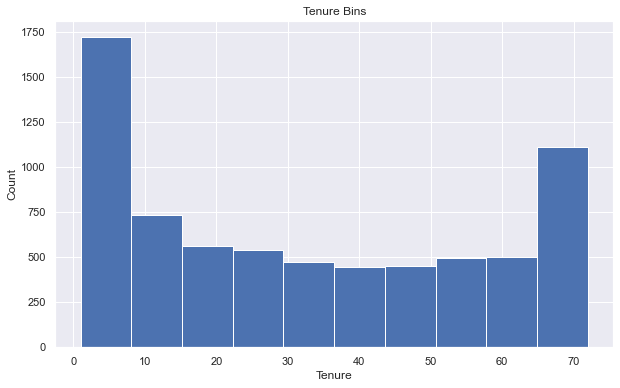

**Value Range**

Low ( 1.00 -  24.67)

Medium ( 24.67 -  48.33)

High ( 48.33 -  72.00)

,tenure,tenure-binned
0,1,Low
1,34,Medium
2,2,Low
3,45,Medium
4,2,Low
5,8,Low
6,22,Low
7,10,Low
8,28,Medium
9,62,High


**Binning Distribution**

Low       3199
High      2239
Medium    1594
Name: tenure-binned, dtype: int64

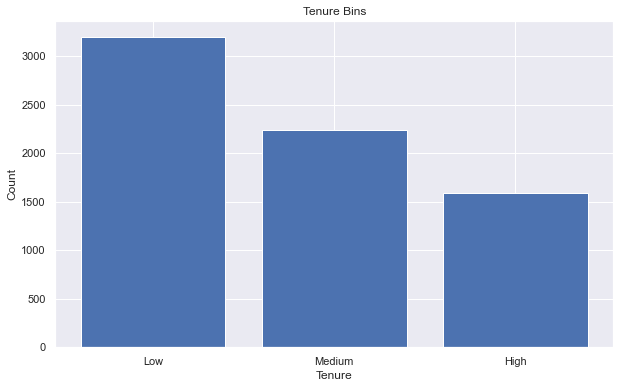

In [176]:

binning_feature('tenure')

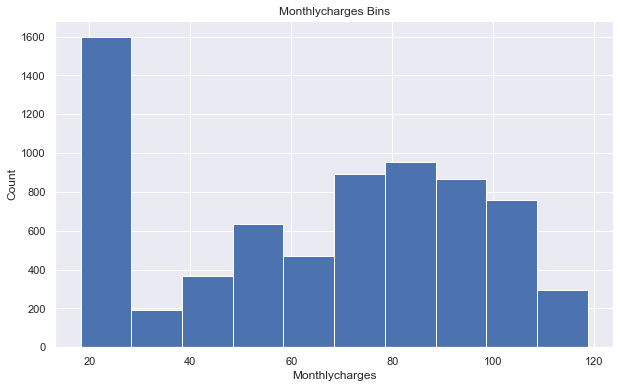

**Value Range**

Low ( 18.25 -  51.75)

Medium ( 51.75 -  85.25)

High ( 85.25 -  118.75)

,MonthlyCharges,MonthlyCharges-binned
0,29.85,Low
1,56.95,Medium
2,53.85,Medium
3,42.30,Low
4,70.70,Medium
5,99.65,High
6,89.10,High
7,29.75,Low
8,104.80,High
9,56.15,Medium


**Binning Distribution**

Low       2445
Medium    2434
High      2153
Name: MonthlyCharges-binned, dtype: int64

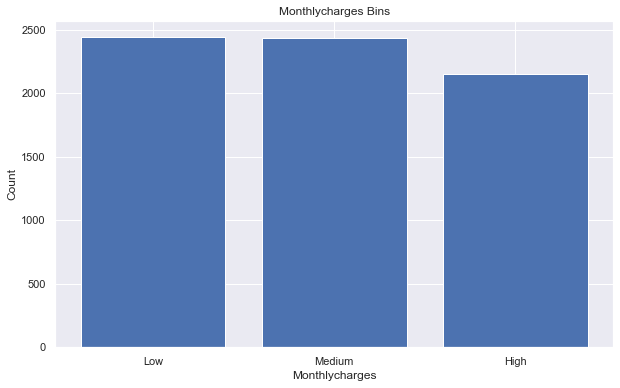

In [177]:

binning_feature('MonthlyCharges')

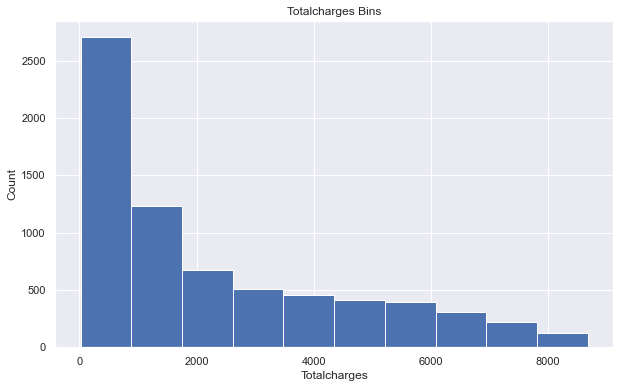

**Value Range**

Low ( 18.80 -  2907.47)

Medium ( 2907.47 -  5796.13)

High ( 5796.13 -  8684.80)

,TotalCharges,TotalCharges-binned
0,29.85,Low
1,1889.50,Low
2,108.15,Low
3,1840.75,Low
4,151.65,Low
5,820.50,Low
6,1949.40,Low
7,301.90,Low
8,3046.05,Medium
9,3487.95,Medium


**Binning Distribution**

Low       4778
Medium    1471
High       783
Name: TotalCharges-binned, dtype: int64

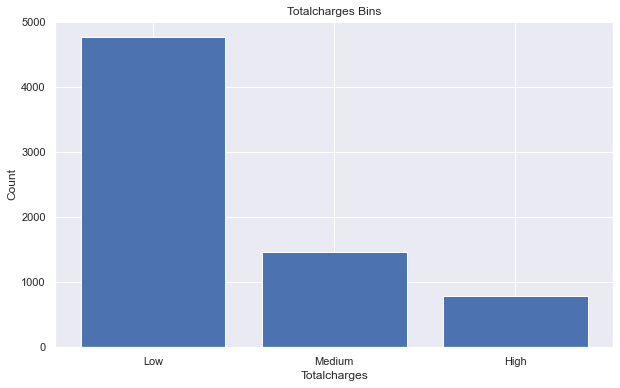

In [178]:
binning_feature('TotalCharges')

In [179]:

printmd("**Data Types**")
df.dtypes.value_counts()

**Data Types**

object      16
category     3
float64      2
int64        2
dtype: int64

In [180]:
df.dtypes

gender                     object
SeniorCitizen               int64
Partner                    object
Dependents                 object
tenure                      int64
PhoneService               object
MultipleLines              object
InternetService            object
OnlineSecurity             object
OnlineBackup               object
DeviceProtection           object
TechSupport                object
StreamingTV                object
StreamingMovies            object
Contract                   object
PaperlessBilling           object
PaymentMethod              object
MonthlyCharges            float64
TotalCharges              float64
tenure-binned            category
MonthlyCharges-binned    category
TotalCharges-binned      category
Churn                      object
dtype: object

# Uni-Variate analysis

In [181]:
# univariate analysis

## Graphical analysis

In [182]:
# graphical analysis

### distribution of numerical columns

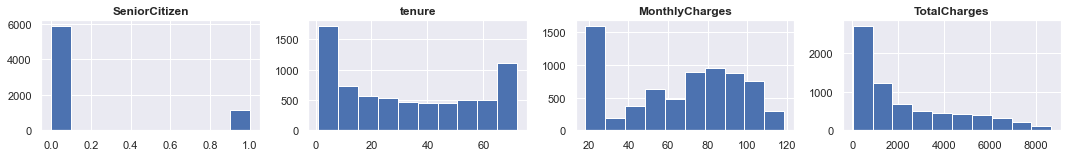

In [192]:
#unvariate analysis

# distribution of Numerical variables

### Checking outliers in numerical features

plt.figure(figsize=(15,10))
for i in enumerate(numerical_features):
    plt.subplot(5, 4, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    plt.hist(data=df, x=i[1],)
    plt.title("{}".format(i[1]), fontweight="bold")
    plt.tight_layout()
    plt.show

### spread of data(outlier detection)

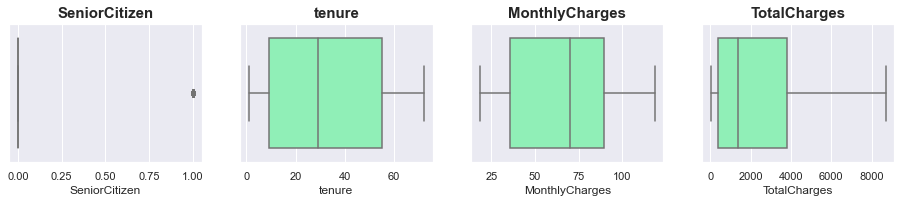

In [193]:

# #outliers

### Checking outliers in numerical features

plt.figure(figsize=(20,30))
for feature in enumerate(numerical_features):
    plt.subplot(10, 5, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=df, x=feature[1], palette = 'rainbow')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

### Distribution of Target variable

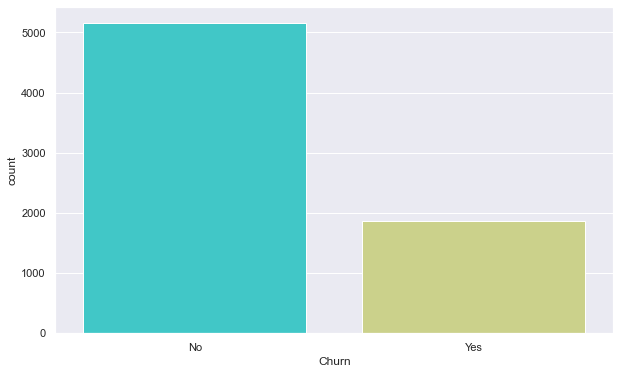

In [194]:
# distribution of target variable

sns.countplot(df['Churn'],palette = 'rainbow')

### Distribution of Categorical columns

In [195]:
# distribution of categorical variables

categorical_features.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

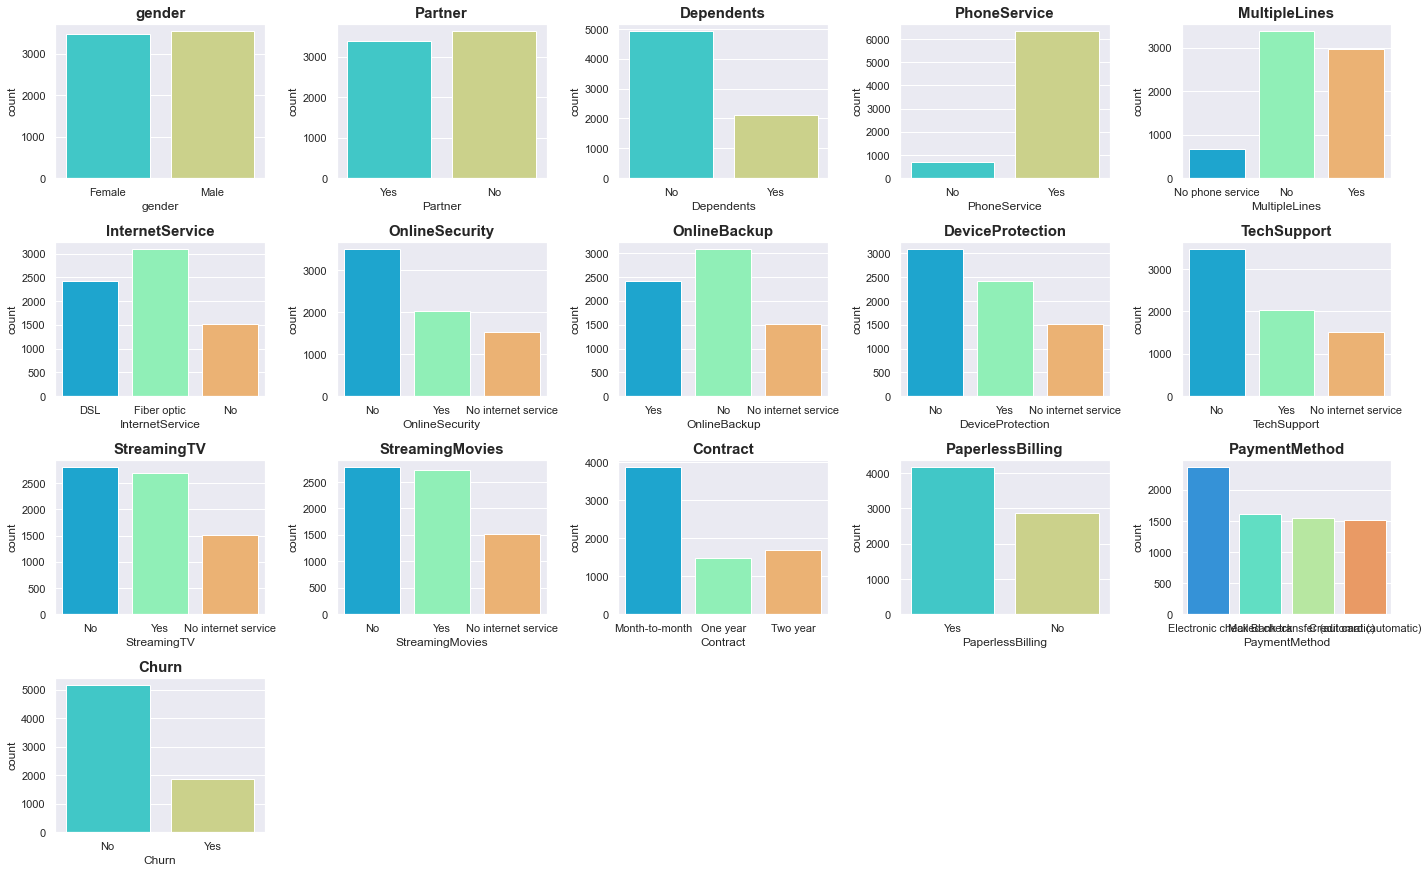

In [196]:
### Checking outliers in numerical features

plt.figure(figsize=(20,30))
for feature in enumerate(categorical_features):
    plt.subplot(10, 5, feature[0]+1)
    sns.set(rc={'figure.figsize':(15,8)})
    sns.countplot(data=df, x=feature[1], palette = 'rainbow')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)
    plt.tight_layout()

##Statistical analysis

In [197]:
#statistical analysis



Statistical Normality Tests


Popular normality tests - D’Agostino’s K^2, Shapiro-Wilk, Anderson-Darling .

There are three numerical features in this dataset - MonthlyCharges, Tenure, and TotalCharges.

Hypotheses -

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

### Normality test

In [198]:
#MonthlyCharges

stat, p = stats.normaltest(df['MonthlyCharges'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=11233.88750, p=0.000
Sample does not look Gaussian (reject H0)


In [199]:
#Tenure

stat, p = stats.normaltest(df['tenure'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=75799.50922, p=0.000
Sample does not look Gaussian (reject H0)


#Bi-Variate analysis


In this section, I did an extensive statistical analysis with various

hypotheses testing based on paired data types like -

1.numerical and numerical data

2.numerical and ordinal data

3.ordinal and ordinal data

4.categorical and categorical data

In [200]:

# Check cardinality of categorical variables 
target_col_filter = df.loc[:, df.columns != 'Churn']


cat_cols = list(set(target_col_filter.columns) - set(target_col_filter._get_numeric_data().columns))

num_cols = list(set(target_col_filter._get_numeric_data().columns) - set({'SeniorCitizen'})) # already converted to integer


# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: target_col_filter[col].nunique(), cat_cols))
dict_features_by_col = dict(zip(cat_cols, object_nunique))


# Print number of unique entries by column, in ascending order
print(sorted(dict_features_by_col.items(), key=lambda x: x[1]))


ordinal_cols = ['tenure-binned', 'MonthlyCharges-binned', 'TotalCharges-binned']
dichotomous_cols = [cat for cat in cat_cols if df[cat].value_counts().count() == 2]
polytomous_cols = list(set(cat_cols) - set(dichotomous_cols) - set(ordinal_cols))


print("Categorical Columns", cat_cols)
print('----------------------------------------')
print("Numerical Columns", num_cols)
print('----------------------------------------')
print("Ordinal Columns", ordinal_cols)
print('----------------------------------------')
print("Dichotomous Columns", dichotomous_cols)
print('----------------------------------------')
print("Polytomous Columns", polytomous_cols)

[('Partner', 2), ('PaperlessBilling', 2), ('Dependents', 2), ('gender', 2), ('PhoneService', 2), ('InternetService', 3), ('OnlineBackup', 3), ('TechSupport', 3), ('StreamingMovies', 3), ('MonthlyCharges-binned', 3), ('StreamingTV', 3), ('Contract', 3), ('DeviceProtection', 3), ('TotalCharges-binned', 3), ('tenure-binned', 3), ('OnlineSecurity', 3), ('MultipleLines', 3), ('PaymentMethod', 4)]
Categorical Columns ['InternetService', 'PaymentMethod', 'Partner', 'OnlineBackup', 'TechSupport', 'PaperlessBilling', 'StreamingMovies', 'MonthlyCharges-binned', 'StreamingTV', 'Contract', 'DeviceProtection', 'TotalCharges-binned', 'Dependents', 'gender', 'tenure-binned', 'PhoneService', 'OnlineSecurity', 'MultipleLines']
----------------------------------------
Numerical Columns ['MonthlyCharges', 'TotalCharges', 'tenure']
----------------------------------------
Ordinal Columns ['tenure-binned', 'MonthlyCharges-binned', 'TotalCharges-binned']
----------------------------------------
Dichotomous 

## Statisical analysis

### Numerical -Numerical

In [201]:
#Spearman rank-order correlation

In [202]:
def cal_spearmanr(c1, c2):

  alpha = 0.05

  correlation, p_value = stats.spearmanr(df[c1], df[c2])

  print(f'{c1}, {c2} correlation : {correlation}, p : {p_value}')

  if p_value > alpha:
    print('Probably do not have monotonic relationship (fail to reject H0)')
  else:
    print('Probably have monotonic relationship (reject H0)')
     

In [203]:

cal_spearmanr('tenure','MonthlyCharges')

tenure, MonthlyCharges correlation : 0.2753387429197595, p : 1.535767470847339e-122
Probably have monotonic relationship (reject H0)


In [204]:
cal_spearmanr('tenure','TotalCharges')

tenure, TotalCharges correlation : 0.8891770805365491, p : 0.0
Probably have monotonic relationship (reject H0)


In [205]:

cal_spearmanr('MonthlyCharges','TotalCharges')

MonthlyCharges, TotalCharges correlation : 0.6380321757758154, p : 0.0
Probably have monotonic relationship (reject H0)


### Numerical - Categorical

In [206]:
#Numerical & Categorical

In [207]:
def kendall_rank_correlation(feature1, feature2):

  coef, p_value = stats.kendalltau(df[feature1], df[feature2])
  print(f"Correlation between {feature1} and {feature2} ")
  print('Kendall correlation coefficient = %.5f, p = %.5f' % (coef, p_value))

  # interpret the significance
  alpha = 0.05
  if p_value > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_value)
  else:
    print('Samples are correlated (reject H0) p=%.3f' % p_value)
  print('---------------------------------------------\n')

In [208]:

ordinal_features = ['tenure-binned','MonthlyCharges-binned', 'TotalCharges-binned']

for ord in ordinal_features:
  printmd(f"Correlation with  **{ord}**")
  kendall_rank_correlation('tenure',ord)
  kendall_rank_correlation('MonthlyCharges',ord)
  kendall_rank_correlation('TotalCharges',ord)

Correlation with  **tenure-binned**

Correlation between tenure and tenure-binned 
Kendall correlation coefficient = -0.28794, p = 0.00000
Samples are correlated (reject H0) p=0.000
---------------------------------------------

Correlation between MonthlyCharges and tenure-binned 
Kendall correlation coefficient = -0.10710, p = 0.00000
Samples are correlated (reject H0) p=0.000
---------------------------------------------

Correlation between TotalCharges and tenure-binned 
Kendall correlation coefficient = -0.23713, p = 0.00000
Samples are correlated (reject H0) p=0.000
---------------------------------------------



Correlation with  **MonthlyCharges-binned**

Correlation between tenure and MonthlyCharges-binned 
Kendall correlation coefficient = -0.16430, p = 0.00000
Samples are correlated (reject H0) p=0.000
---------------------------------------------

Correlation between MonthlyCharges and MonthlyCharges-binned 
Kendall correlation coefficient = -0.22591, p = 0.00000
Samples are correlated (reject H0) p=0.000
---------------------------------------------

Correlation between TotalCharges and MonthlyCharges-binned 
Kendall correlation coefficient = -0.20817, p = 0.00000
Samples are correlated (reject H0) p=0.000
---------------------------------------------



Correlation with  **TotalCharges-binned**

Correlation between tenure and TotalCharges-binned 
Kendall correlation coefficient = 0.07500, p = 0.00000
Samples are correlated (reject H0) p=0.000
---------------------------------------------

Correlation between MonthlyCharges and TotalCharges-binned 
Kendall correlation coefficient = 0.00426, p = 0.65142
Samples are uncorrelated (fail to reject H0) p=0.651
---------------------------------------------

Correlation between TotalCharges and TotalCharges-binned 
Kendall correlation coefficient = 0.12440, p = 0.00000
Samples are correlated (reject H0) p=0.000
---------------------------------------------



In [209]:
#Mann-Whitney U Test

In [210]:

def mannwhitneyu_correlation(feature1):
  stat, p_value = stats.mannwhitneyu(df[feature1], (df['Churn'] == 'Yes').astype(int))
  print(f"Correlation between {feature1} and Churn")
  print('Statistics = %.5f, p = %.5f' % (stat, p_value))
  
  # interpret the significance
  alpha = 0.05
  if p_value > alpha:
      print('Same distribution (fail to reject H0)')
  else:
      print('Different distribution (reject H0)')
  print('----\n') 

In [211]:
numerical_features = ['tenure','MonthlyCharges', 'TotalCharges']

for num in numerical_features:
  printmd(f"Correlation with **{num}**")
  mannwhitneyu_correlation(num)

Correlation with **tenure**

Correlation between tenure and Churn
Statistics = 572848.50000, p = 0.00000
Different distribution (reject H0)
----



Correlation with **MonthlyCharges**

Correlation between MonthlyCharges and Churn
Statistics = 0.00000, p = 0.00000
Different distribution (reject H0)
----



Correlation with **TotalCharges**

Correlation between TotalCharges and Churn
Statistics = 0.00000, p = 0.00000
Different distribution (reject H0)
----



### Categorial -Categorical

In [212]:
#Categorical & categorical

def calculate_chi_square(feature1, feature2='Churn'):
  printmd(f"Correlation between **{feature1}** and **{feature2}**")
  crosstab = pd.crosstab(df[feature1], df[feature2])
  # display(crosstab)
  stat, p, dof, expected = stats.chi2_contingency(crosstab,correction=True)


  print(f'p-value : {p}, degree of freedom: {dof}')
  # print("expected frequencies :\n", expected)

  # interpret test-statistic
  prob = 0.95
  critical = stats.chi2.ppf(prob, dof)
  print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

  if abs(stat) >= critical:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')
  
  # interpret p-value
  alpha = 1.0 - prob
  
  print('significance=%.3f, p=%.3f' % (alpha, p))
  if p <= alpha:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')
  print('-----------------------------------\n')


In [213]:

printmd("**Chi-Squre Correlation Between Dichotomous Features with Target : Churn**")

for col in dichotomous_cols:
  calculate_chi_square(col)

**Chi-Squre Correlation Between Dichotomous Features with Target : Churn**

Correlation between **Partner** and **Churn**

p-value : 3.97379757451591e-36, degree of freedom: 1
probability=0.950, critical=3.841, stat=157.503
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **PaperlessBilling** and **Churn**

p-value : 8.236203353962564e-58, degree of freedom: 1
probability=0.950, critical=3.841, stat=256.875
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Dependents** and **Churn**

p-value : 2.0196592017051303e-42, degree of freedom: 1
probability=0.950, critical=3.841, stat=186.322
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **gender** and **Churn**

p-value : 0.4904884707065509, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.475
Independent (fail to reject H0)
significance=0.050, p=0.490
Independent (fail to reject H0)
-----------------------------------



Correlation between **PhoneService** and **Churn**

p-value : 0.34992398942431924, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.874
Independent (fail to reject H0)
significance=0.050, p=0.350
Independent (fail to reject H0)
-----------------------------------



In [214]:

printmd("**Chi-Squre Correlation Between Polytomous Features with Target : Churn**")

for col in polytomous_cols:
  calculate_chi_square(col)

**Chi-Squre Correlation Between Polytomous Features with Target : Churn**

Correlation between **StreamingTV** and **Churn**

p-value : 1.324641113169159e-81, degree of freedom: 2
probability=0.950, critical=5.991, stat=372.457
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **InternetService** and **Churn**

p-value : 5.831198962237274e-159, degree of freedom: 2
probability=0.950, critical=5.991, stat=728.696
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **PaymentMethod** and **Churn**

p-value : 1.4263098511063342e-139, degree of freedom: 3
probability=0.950, critical=7.815, stat=645.430
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **DeviceProtection** and **Churn**

p-value : 1.9593887862403176e-121, degree of freedom: 2
probability=0.950, critical=5.991, stat=555.880
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Contract** and **Churn**

p-value : 7.326182186265472e-257, degree of freedom: 2
probability=0.950, critical=5.991, stat=1179.546
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **OnlineBackup** and **Churn**

p-value : 7.776099238804965e-131, degree of freedom: 2
probability=0.950, critical=5.991, stat=599.175
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **TechSupport** and **Churn**

p-value : 7.407807748843711e-180, degree of freedom: 2
probability=0.950, critical=5.991, stat=824.926
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **OnlineSecurity** and **Churn**

p-value : 1.4006867477839222e-184, degree of freedom: 2
probability=0.950, critical=5.991, stat=846.677
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **StreamingMovies** and **Churn**

p-value : 5.353560421401324e-82, degree of freedom: 2
probability=0.950, critical=5.991, stat=374.268
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **MultipleLines** and **Churn**

p-value : 0.0035679273999811405, degree of freedom: 2
probability=0.950, critical=5.991, stat=11.272
Dependent (reject H0)
significance=0.050, p=0.004
Dependent (reject H0)
-----------------------------------



In [215]:

calculate_chi_square('PaymentMethod','MultipleLines')

Correlation between **PaymentMethod** and **MultipleLines**

p-value : 1.216564211436556e-81, degree of freedom: 6
probability=0.950, critical=12.592, stat=392.377
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



In [216]:
calculate_chi_square('PaymentMethod','PhoneService')

Correlation between **PaymentMethod** and **PhoneService**

p-value : 0.8536395500879111, degree of freedom: 3
probability=0.950, critical=7.815, stat=0.783
Independent (fail to reject H0)
significance=0.050, p=0.854
Independent (fail to reject H0)
-----------------------------------



In [217]:

calculate_chi_square('PaymentMethod','Contract')

Correlation between **PaymentMethod** and **Contract**

p-value : 6.908556640756664e-213, degree of freedom: 6
probability=0.950, critical=12.592, stat=1000.518
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



## Graphical Analysis

### Numerical - Numerical

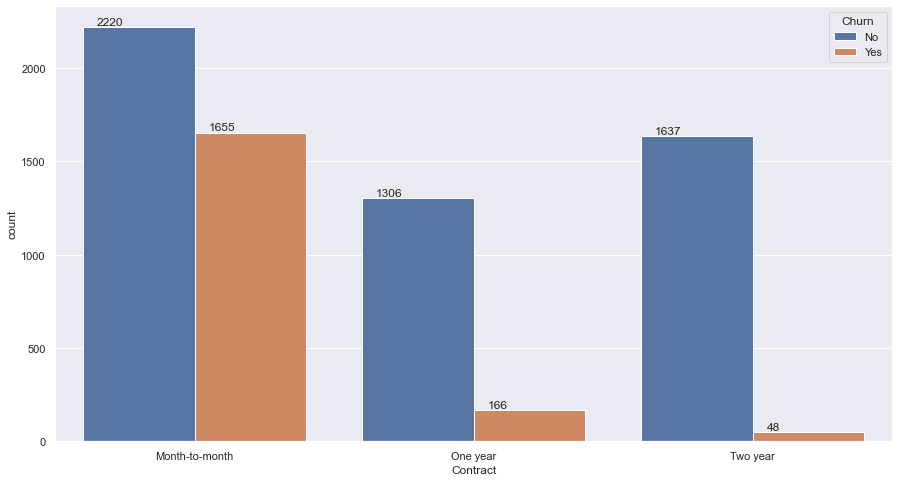

**Most churned users has Month-to-month contract**

In [218]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Contract',hue='Churn',data=df)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

printmd("**Most churned users has Month-to-month contract**")
     

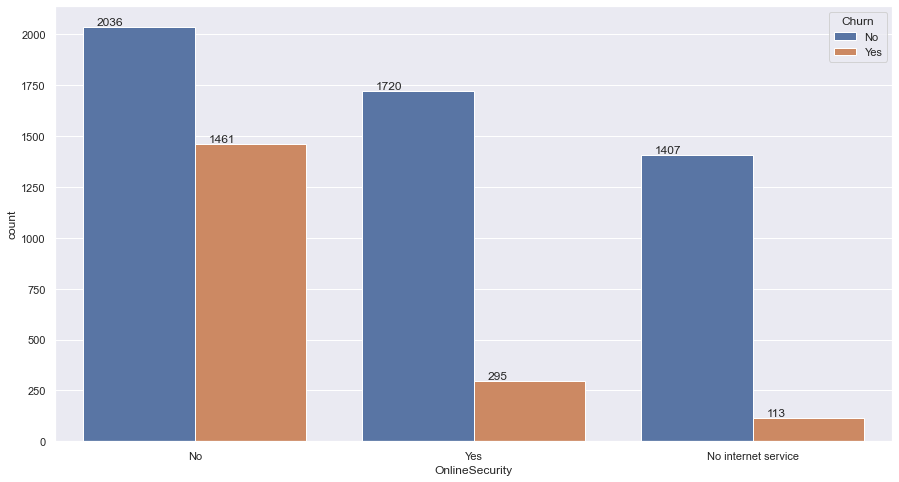

**Most churned users didn't have online security**

In [219]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='OnlineSecurity',hue='Churn',data=df)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

printmd("**Most churned users didn't have online security**")

### Numerical - Categorical

**Most users who churned does not have a partner in contrast to the users who does**

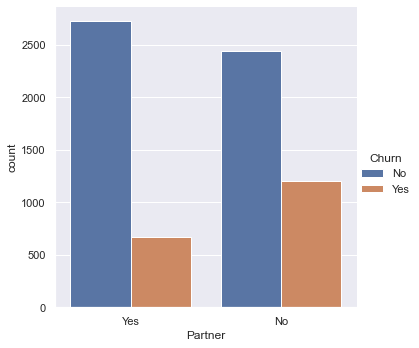

In [220]:
sns.catplot(x='Partner',hue='Churn',data=df, kind="count");

printmd("**Most users who churned does not have a partner in contrast to the users who does**")

**Gender is uncorrelated with churn rate**

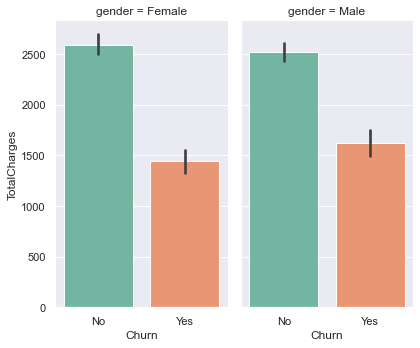

In [221]:

sns.catplot(x='Churn',y='TotalCharges', col = 'gender', data=df,
                kind='bar', aspect=.6, palette='Set2')

printmd("**Gender is uncorrelated with churn rate**")

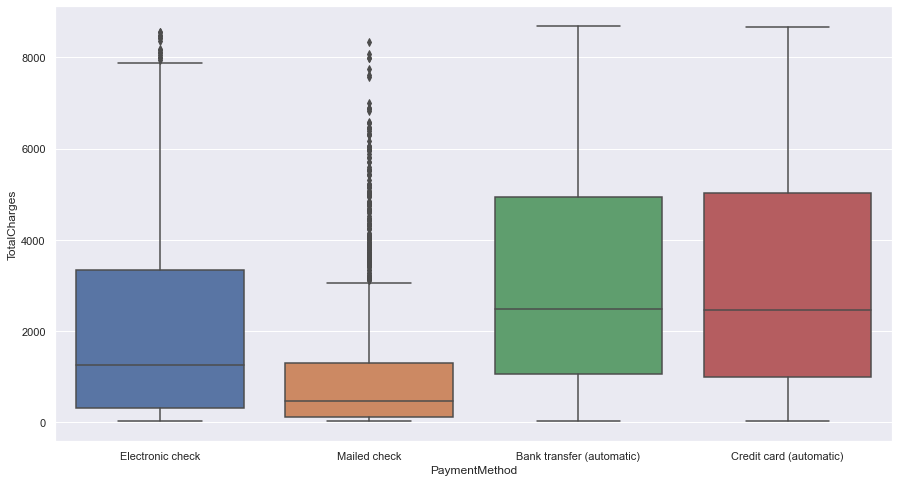

**Total Charges for many users are in extreme level in Mailed Check payment method**

In [222]:

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="PaymentMethod", y="TotalCharges", data=df)
plt.show()

printmd("**Total Charges for many users are in extreme level in Mailed Check payment method**")

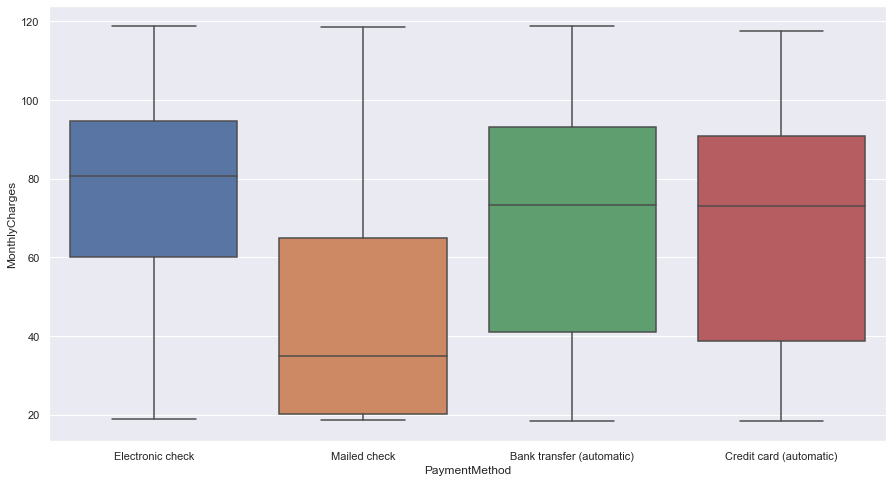

In [223]:

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="PaymentMethod", y="MonthlyCharges", data=df)
plt.show()

### Categorical - Categorical

# Multi -variate analysis

### Heatmap

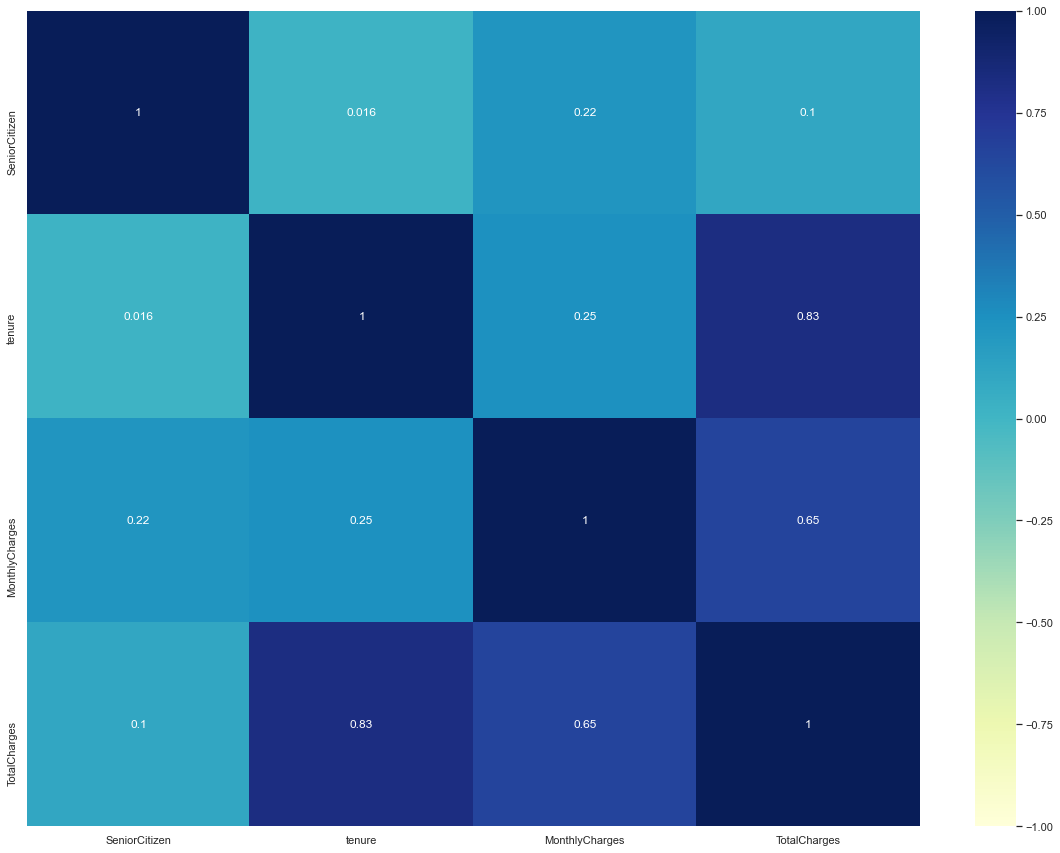

In [224]:

# correlation


### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(df.corr(), annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

### Pairplot

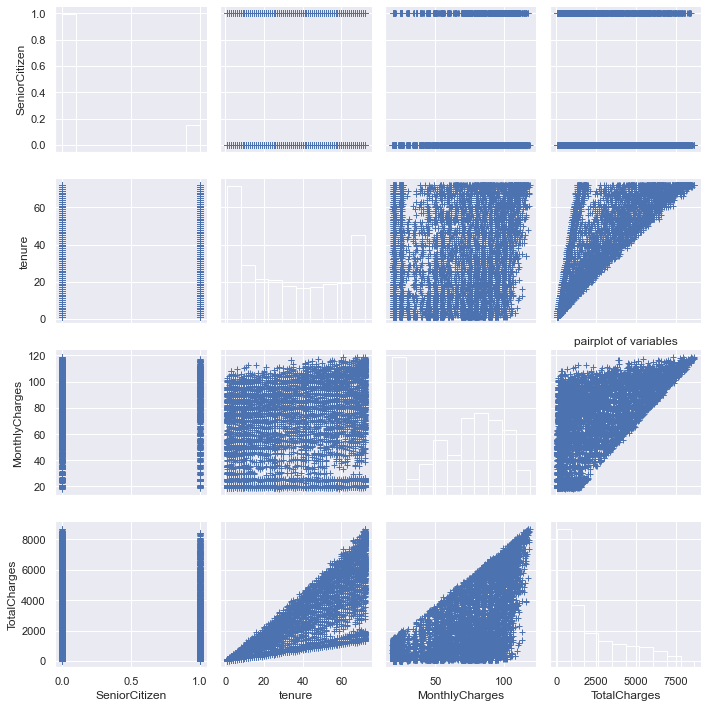

In [225]:
sns.pairplot(
    df,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)
plt.title('pairplot of variables')
plt.tight_layout()
plt.show()

# Data wrangling or Feature engineering

### Correleation removal

In [226]:
# correlation features



def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [227]:
corr_features = correlation(df, 0.75)
len(set(corr_features))
     

1

### outlier removal



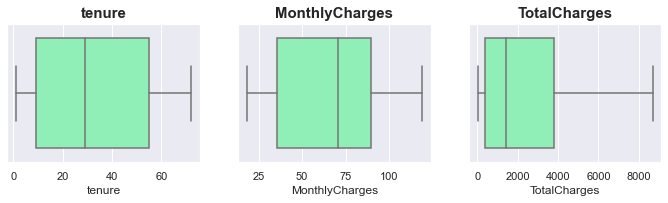

In [228]:
# #outliers

### Checking outliers in numerical features

plt.figure(figsize=(20,30))
for feature in enumerate(numerical_features):
    plt.subplot(10, 5, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=df, x=feature[1], palette = 'rainbow')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

In [229]:
### Function to Cap Outlier
def remove_outliers(in_data, in_col):
    # Finding the IQR
    first_quartile = in_data[in_col].quantile(0.25)
    third_quartile = in_data[in_col].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col]= upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col]= lower_limit    
    return in_data

In [230]:
### Capping outliers from numerical features
for feature in numerical_features:
    
    dataset=remove_outliers(df, feature)

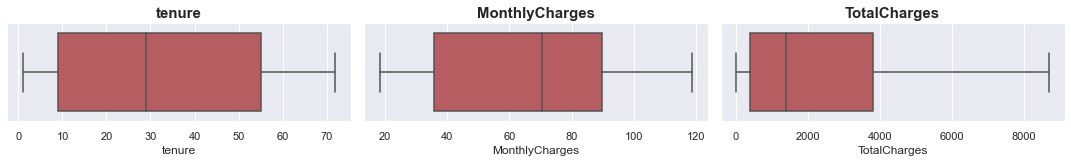

In [231]:
### Checking outliers in numerical features after capping

plt.figure(figsize=(20,20))
for feature in enumerate(numerical_features):
    plt.subplot(10, 4, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=df, x=feature[1], color='r')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)
    plt.tight_layout()

In [232]:

# Encoding Categorical variables
categorical_features.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [233]:
#  encoding target variable

df['Churn'] = df['Churn'].map({'Yes':1,'No':0})
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [234]:
X = df.drop('Churn',axis =1)
y = df['Churn']

### Spliting the dataset

In [235]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Churn']),
                                                 df['Churn'],
                                                 test_size=0.2,
                                                random_state=23)

In [236]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

###Encoding the categorical variables

In [237]:
t1 = ColumnTransformer([
    ('onehot',OneHotEncoder(sparse = False,handle_unknown='ignore'),[0,2,3,4,6,7,8,9,10,11,12,13,14,15,18,19,20])
],remainder='passthrough')

t2 = ColumnTransformer([
    ('scale',StandardScaler(),slice(1,20))
    
])

In [238]:
pipe = make_pipeline(t1,t2)

In [239]:
X_train=pipe.fit_transform(X_train)

In [240]:
X_test = pipe.transform(X_test)

In [241]:
X_train.shape, y_train.shape

((5625, 19), (5625,))

In [242]:
X_test.shape, y_test.shape

((1407, 19), (1407,))

# Model Building

In [243]:
from sklearn import naive_bayes
models={
 "Logistic Regression":LogisticRegression(),
 "Naive Bayes":GaussianNB(),
 "Decision Tree Classifier":DecisionTreeClassifier(),
 "Random Forest Classifier":RandomForestClassifier(),
 "Bagging Classifier": BaggingClassifier(base_estimator=LogisticRegression()),
 "Extra Tree Classifier": ExtraTreesClassifier(),
 "AdaBoost Classifier": AdaBoostClassifier(),
 "GradientBoost Classifier": GradientBoostingClassifier(),
 "XGBoost Classifier": XGBClassifier(),
 #"Light GBM Classifer":LabelEncoder(),
 "Cat Boost Classifer":CatBoostClassifier()
}

In [244]:
def model_trainer(model, X_train_data, y_train_data, X_test_data):
 """
 This function takes model object, X train data, y train data, and 
 X test data as argument, trains model and gives prediction for train data 
 and prediction for test data.
 """
 model.fit(X_train, y_train)
 y_train_pred=model.predict(X_train)
 pred_val=model.predict(X_test)
 return y_train_pred, pred_val

In [245]:
def model_evaluator(actual_val, pred_val):

 acc=round(accuracy_score(actual_val, pred_val),5)
 prec=round(precision_score(actual_val, pred_val),5)
 rec=round(recall_score(actual_val, pred_val),5)
 roc_auc=round(roc_auc_score(actual_val, pred_val),5)
 return acc, prec, rec, roc_auc
 

In [246]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
acc_score_list=[]
### creating empty list for storing precision score
prec_score_list=[]
### creating list to store recall score
recall_list=[]
### creating list to store roc_auc score
roc_auc_list=[]

### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_train,y_pred )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, roc_auc))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_test,pred_val)
    print("Model Performance for Test dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, roc_auc))
    
    ### Appending model name and Performance score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    acc_score_list.append(acc_score)
    prec_score_list.append(prec_score)
    recall_list.append(rec_score)
    roc_auc_list.append(roc_auc)
    print("-"*50)
    print("\n")

Logistic Regression Model

Model Performance for training dataset
Accuracy score: 0.76124
Precision Score: 0.6092
Recall Score: 0.25136
Roc_Auc Score: 0.597
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.73845
Precision Score: 0.58503
Recall Score: 0.21883
Roc_Auc Score: 0.57934
--------------------------------------------------


Naive Bayes Model

Model Performance for training dataset
Accuracy score: 0.7136
Precision Score: 0.46365
Recall Score: 0.58333
Roc_Auc Score: 0.67164
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.69581
Precision Score: 0.4612
Recall Score: 0.52926
Roc_Auc Score: 0.64481
--------------------------------------------------


Decision Tree Classifier Model

Model Performance for training dataset
Accuracy score: 0.77262
Precision Score: 0.62086
Recall Score: 0.34282
Roc_Auc Score: 0.63417
--------------------------------------------------
Model Perfo

In [247]:
### Tabulating model performance in dataframe
model_performance=pd.DataFrame(list(zip(model_list, acc_score_list,prec_score_list, recall_list, roc_auc_list)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'Roc_Auc Score']).sort_values(by=['Accuracy'], ascending=False,).reset_index()
model_performance.drop('index', axis=1, inplace=True)
model_performance

,Model,Accuracy,Precision,Recall,Roc_Auc Score
0,Cat Boost Classifer,0.74485,0.59043,0.28244,0.60325
1,Decision Tree Classifier,0.74200,0.58152,0.27226,0.59816
2,Random Forest Classifier,0.74200,0.57653,0.28753,0.60284
3,Extra Tree Classifier,0.74200,0.58152,0.27226,0.59816
4,Bagging Classifier,0.73916,0.58442,0.22901,0.58295
5,Logistic Regression,0.73845,0.58503,0.21883,0.57934
6,AdaBoost Classifier,0.73774,0.58219,0.21628,0.57806
7,XGBoost Classifier,0.73774,0.56667,0.25954,0.59131
8,GradientBoost Classifier,0.73561,0.56688,0.22646,0.57970
9,Naive Bayes,0.69581,0.46120,0.52926,0.64481


# Model hyper parameter Tuning


In [252]:
pip install tpot


  Using cached TPOT-0.11.7-py3-none-any.whl (87 kB)
  Using cached stopit-1.1.2.tar.gz (18 kB)
  Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11959 sha256=ff44e5224c443920f24e305f4d2dfbeda52844c80a8926a0447588ca5ad04ef4
  Stored in directory: c:\users\91822\appdata\local\pip\cache\wheels\a8\bb\8f\6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit


In [253]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV



n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]


max_features = ['auto', 'sqrt','log2']


max_depth = [int(x) for x in np.linspace(10, 1000,10)]


min_samples_split = [2, 5, 10,14]


min_samples_leaf = [1, 2, 4,6,8]


param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}


print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [254]:

from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 5, population_size= 5, offspring_size= 3,
                                 verbosity= 2, early_stop= 2,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/20 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.760354774592795

Generation 2 - Current best internal CV score: 0.760354774592795

Generation 3 - Current best internal CV score: 0.760354774592795

The optimized pipeline was not improved after evaluating 2 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, criterion=entropy, max_depth=670, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=400)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      120,
                                                                                      230,
                                                                                      340,
                                                                                      450,
                                                                                      560,
                                                                                      670,
                                                                                      780,
                                                                                 

In [255]:
rf = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto', min_samples_leaf=4, min_samples_split=5, n_estimators=600)
rf.fit(X_train,y_train)
predictionforest = tpot_classifier.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc5 = accuracy_score(y_test,predictionforest)

[[951  63]
 [301  92]]
0.7412935323383084
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1014
           1       0.59      0.23      0.34       393

    accuracy                           0.74      1407
   macro avg       0.68      0.59      0.59      1407
weighted avg       0.71      0.74      0.70      1407



# Model deployement


In [257]:
import pickle

In [258]:
#model
pickle.dump(rf,open('clf.pkl','wb'))

In [259]:
# preprocessing
pickle.dump(pipe,(open('k.pkl','wb')))

In [260]:
pickled = pickle.load(open('k.pkl','rb'))

In [261]:
pickled

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 2, 3, 4, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 18, 19,
                                                   20])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(1, 20, None))]))])

In [262]:
y[5]

1

In [263]:
X.iloc[5].values

array(['Female', 0, 'No', 'No', 8.0, 'Yes', 'Yes', 'Fiber optic', 'No',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes',
       'Electronic check', 99.65, 820.5, 'Low', 'High', 'Low'],
      dtype=object)